# Welcome to My Pandas Cookbook  

## Best Practices

In [ ]:
# Explicitly declare date values as "datetime" values e.g
gold_df['Date'] = pd.to_datetime(gold_df['Date'])

# When Doing a date difference condition ALWAYS bring out  a datediff column, it will help clear up any erroneous results you might get

# If you have multiple values to convert to datetime

cols = ['Total Break Time','col1','col2']
df[cols] = df[cols].apply(pd.to_datetime)

## List of stuff to know :- 
---  

### Absolute vs Relative 
- The Absolute path is the full path to some place on your computer.   
- The Relative path is the path to some file with respect to your current working directory (PWD).    

For example:-

Absolute path: C:/users/admin/docs/stuff.txt  <-- use this always, don't be lazy!!!

If my PWD is C:/users/admin/, then the relative path to stuff.txt would be: docs/stuff.txt

### Ascend and Descending sorting formats
- Ascend format is from A-Z, or smallest number to largest number, or oldest date to Newest Date
- Descend format is from Z-A, or largest  number to smallest number, or Newest date to Oldest Date


# Big list of Pandas Bugs and errors that will trip you up
---

1. If you add a column to your data set, make sure you add it even when selecting a df subset of the columns
- This issue caused no errors when refferencing non-existing columns in df subsets in loop itteration
e.g 

```
if you add a column : 'nuDataColumn' , make sure to add it to subset

oldDataset = [['columns1','column3']]
nuDataset = [['columns1','column3','nuDataset']]
```

2. Warning making column(s)!! an index, makes them immutable!! 

3. datetime differences CAN and WILL give you negative values. So unless you want to avoid seeing negative date values, use `datetime>0` condition

In [ ]:
import pandas as pd
import xlrd
from datetime import datetime

'''Excel Files'''
date_cols = ['date_cc']
df_excel = pd.read_excel(r'C:\Users\Burudani\Documents\mainPythonFolder_v1\SpreadsheetFiles\Coffee_v1.xlsx',
sheet_name='Coffee')
# Specifying data types
df_excel = pd.read_excel(r'C:\Users\Burudani\Documents\mainPythonFolder_v1\SpreadsheetFiles\Coffee_v1.xlsx',
sheet_name='Coffee',
dtype = {"image": str,
         "freq": float})


'''CSV Files'''
date_cols = ['date_cc'] # Specifying columns to be treated as datetimes, and passing it to the pandas 
df_csv = pd.read_csv (r'C:\Users\Burudani\Documents\mainPythonFolder_v1\SpreadsheetFiles\climate_change.csv',parse_dates=date_cols,
dtype={"co2": float,
"relative_temp": float})

# Specifying index column via column location
medals = pd.read_csv(r'C:\Users\Burudani\Documents\mainPythonFolder_v1\SpreadsheetFiles\medals_by_country_2016.csv',index_col = 0)  

# Specifying index column via column name

indexColumns = ['ID','Name'] # should n be date columns as this allows you to parse through them easier
summer2016 = pd.read_csv(r'C:\Users\Burudani\Documents\mainPythonFolder_v1\SpreadsheetFiles\summer2016.csv',index_col = indexColumns)  



## Print columns as a list



In [ ]:
import pandas as Pd
data2 = [['julian', 14], ['3096793G009', 33], ['3096793G9', 14]]

# Create the pandas DataFrame
df2 = pd.DataFrame(data2, columns = ['Bpn', 'name'])
print('These are the columns:- \n', list(df2.columns))

## Find column type

In [ ]:
print(df1.column.dtype)

## Formatting Dates  

### Common Errors  
- AttributeError: 'datetime.datetime' object has no attribute 'days' :  for this use  "day" instead of "days".  Don't confuse this with timedelta objects which does have the attribute "days"


In [ ]:
# importing pandas as pd
import pandas as pd
  
# Create the Timestamp object
# ts = pd.Timestamp(year = 2015,  month = 10, day = 6,
#            hour = 10, second = 49, tz = 'US/Central')
ts = pd.Timestamp(year = 2015,  month = 10, day = 6)
  
# Print the Timestamp object
print(ts.date())


ts2 =pd.Timestamp("1980-01-01")
print(ts2.date())
print(ts2)


#convert datetime value to simply year-month format e.g  2021-10
df1['DATE'] = df1['DATE'].dt.to_period('M')


## Using condition on a dataframe

In [ ]:
# Creating a new Df cleanly using  a condition to get  males, and gymnasts, also specifying  what columns are needed

date_cols = ['Year']
summer2016 = pd.read_csv(r'C:\Users\Burudani\Documents\mainPythonFolder_v1\SpreadsheetFiles\summer2016.csv',parse_dates=date_cols)

slicedDf = summer2016.loc[(summer2016.Sex == "M" ) & (summer2016.Sport == "Gymnastics" ),["Sex","Sport"]]

#Reseting the index after obtaining the slice...mainly for ease of viewing
slicedDf.reset_index(drop=True, inplace = True)

print(slicedDf)




## Applying a date condition to a dataframe

- Workign with dates can ve EXTREMELY tricky, and is often one of if not the most trickiest prt to deal with when processing dataframes
- These are the best practices for when dealing with dates in dataframes :-  
    1. make sure ALL date columns are converted to and are recognized as dates by using the "parse dates function" when creating the DF
    2. Ensure that all dates that are to be used in the condition are in PROPER -US Timestamp format i.e YYYY-MM-DD 
    

In [ ]:
# US Timestamp format example
import pandas as pd 
exampleFormat = pd.Timestamp(year=2017, month=1, day=26, hour=12)
print(exampleFormat)

In [ ]:
#Parsing dates -  letting python know the date column is made up of "actual dates"
date_cols =  ['date_cc']
df_climateChange = pd.read_csv (r'C:\Users\Burudani\Documents\mainPythonFolder_v1\SpreadsheetFiles\climate_change.csv',
parse_dates=date_cols)

#applying a date condition to slice the data and provide a new dataframe
df_eighties = df_climateChange[(df_climateChange.date_cc > '1980-01-06') & (df_climateChange.date_cc <= '1989-12-31')]

#Reseting the index after obtaining the slice...mainly for ease of viewing
df_eighties.reset_index(drop=True, inplace = True)

print(df_eighties)




## Assigning and Re-assigning dataframes  

- Use the "in place" command e.g 
- Otherwise you may have to re-assign the dataframe to avoid duplication issues

## Deleting(dropping) and adding columns

In [ ]:

df = df.drop(df.columns[[0, 1, 3]], axis=1)  # df.columns is zero-based pd.Index


'''This can be done more elegantly below :- '''

columns = ['Col1', 'Col2', ...]
df.drop(columns, inplace=True, axis=1)

# or using indices

columns = [0,3, ...]
df.drop(columns, inplace=True, axis=1)

'''Getting a list of columns to see which one to drop'''

columnNumber = 0
for col in df.columns:
    print('Column Number: ', columnNumber, 'Column Name: ',col )
    columnNumber = columnNumber + 1



'''Dropping  a range of columns in a list '''

# NB range(3,6,1)  it means numbers 3 to 5 , with a step of 1

columns = [0,1,3 *range(4,9,1), 9,10,*range(11,15,1)]
df.drop(columns, inplace=True, axis=1)

## Dropping rows based on a condition



In [ ]:

# The ":", means keep all columns
df = df.loc[~((df['col_1'] == 1.0) & (df['col_2'] == 0.0)),:]

## Using groupby
-  Note: groupby creates a groupby object and NOT a new dataframe

In [ ]:
import pandas as pd


df = pd.read_csv(r"SpreadsheetFiles\nba.csv")
# First grouping based on "Team"
# Within each team we are grouping based on "Position"
gkk = df.groupby(['Team', 'Position'])
  
# Print the first value in each group
print(gkk)
#gkk.first()


In [ ]:
import pandas as pd
import re
 
# initialize list of lists
#data1 = [['john', 14],['3096793G9', 'dd'], ['nick', 15], ['juli', 14]]
data1 = [['john', 14],['3096793G9', 33], ['nick', 15], ['juli', 14]] 
# Create the pandas DataFrame
df1 = pd.DataFrame(data1, columns = ['Dpn', 'name'])
 
# initialize list of lists
#data2 = [['jilian', 14], ['3096793G009', 'bb'], ['barbra', 14]]
data2 = [['jilian', 14], ['3096793G009', 33], ['3096793G9', 14]]
 
# Create the pandas DataFrame
df2 = pd.DataFrame(data2, columns = ['Bpn', 'name'])


#easy way to print columns
print('These are the columns:- \n', list(df2.columns))

# print dataframe.
#print(df2)


print('-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-')

for index2, row2 in df2.iterrows(): #rep
    for index1, row1 in df1.iterrows(): #dc  dp is goign to change
        #if row1['Dpn'].re.match('\w[0]{0,2}\d')== row2['Bpn'] :
      
        testword = (row1['Dpn'][:7])+'\w[0]{0,2}\d'
        #print(testword, 'testing match with',row2['Bpn'] )
        jimmy = re.match((row1['Dpn'][:7])+'\w[0]{0,2}\d',row2['Bpn'])
        #print('*******************************************')
     
        #print(row1['Dpn'],row2['Bpn'])
        if jimmy:
            #print('Match found',jimmy.group(0))
            matchTester = 'Match Exists'
        else:
            matchTester = 'Match Does not Exists'
        print(testword, 'testing match with',row2['Bpn'],matchTester )




In [ ]:
import pandas as pd
 

df = pd.read_excel(r'C:\Users\Burudani\Documents\testerDoc.xlsx',
sheet_name='Sheet1')
# initialize list of lists

#df[df.columns[0:4]].fillna(value=0, inplace=True)

#gapminder[gapminder.columns[0:2]].head()

str_cols = ['Name','oname', 'cname','dname','Lname','Age']
columns2drop = ['dname', 'Lname']
 
print(str_cols)
df[str_cols] = df[str_cols].fillna('')

#df.oname.fillna(value = 'N/A',inplace = True)

# def concatColumns(stringColumnList):
#     nucombinedColumn = []
#     for column in stringColumnList:
#         nucombinedColumn.append('df['+'"'+column +'"'+']'+ ';')
#     print (nucombinedColumn)

# concatColumns(str_cols)
 
# for columns str_cols:
#     df['Nucolumn'] = 


df['Nucolumn'] = df['Name'] +';'\
+ df['oname']+';'\
+ df['cname']+';'\
+ df['dname']+';'\
+ df['Lname']+';'

#TODO strip spaces from final column output hint*** USE REGEX
print(df)
#df.Nucolumn = df.Nucolumn.apply(lambda x : (x.replace(';{1,3}','x',False)))
df.Nucolumn = df.Nucolumn.replace(to_replace=';{1,9}|^;{1}', value=';', regex=True)
df.Nucolumn = df.Nucolumn.replace(to_replace=';{1,9}|^;{1}', value=';', regex=True)
df.Nucolumn = df.Nucolumn.replace(to_replace='^;{1}', value='', regex=True)

df.drop(columns = columns2drop, inplace = True)

print(df)
#print(newdf)

In [15]:
import pandas as pd
import plotly.express as px

# data
df = pd.DataFrame({'A': {0: 34, 1: 34, 2: 34, 3: 34, 4: 56, 5: 56, 6: 78},
                     'B': {0: 34, 1: 223, 2: 56, 3: 86, 4: 86, 5: 43, 6: 34},
                     'C': {0: -12, 1: -12, 2: -12, 3: -12, 4: -12, 5: -12, 6: -12}})

colors = px.colors.qualitative.T10

# plotly
fig = px.bar(df, 
             x = df.index,
             y = [c for c in df.columns],
             template = 'plotly_dark',
             color_discrete_sequence = colors,
             title = 'Stacked bar chart using px.bar()', 
             )

fig.show()
print('hello world')

ModuleNotFoundError: No module named 'plotly'

In [16]:
# imports
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import pandas as pd
import numpy as np

# setup
init_notebook_mode(connected=True)
np.random.seed(123)
cf.set_config_file(theme='pearl')

# qtconsole for debugging
#%qtconsole --style vim #src# https://qtconsole.readthedocs.io/en/stable/

# Random data using cufflinks
df = cf.datagen.lines()
df = df[['UUN.XY', 'MJF.XV', 'XBB.AO']].head(50)
df=np.abs(df)

# make figure
fig = df.iplot(asFigure=True, kind='bar', barmode = 'stack',
               xTitle='Dates',yTitle='Returns',title='Returns')

# plot figure
iplot(fig)

ModuleNotFoundError: No module named 'plotly'

In [ ]:
data = [['Ravi',21,67],['Kiran',24,61],['Anita',18,46],['Smita',20,78],['Sunil',17,90]]
df = pd.DataFrame(data,columns = ['name','age','marks'],dtype = float)
trace = go.Bar(x = df.name, y = df.marks)
fig = go.Figure(data = [trace])
iplot(fig)

In [ ]:
data = [['Ravi',21,67],['Kiran',24,61],['Anita',18,46],['Smita',20,78],['Sunil',17,90]]
df = pd.DataFrame(data,columns = ['name','age','marks'],dtype = float)
df.iplot(kind = 'bar', x = 'name', y = 'marks')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib

#Bring in original Data sheet
df1 = pd.read_excel(r"C:\Users\Burudani\Documents\Finance_Trending\Checking_Jan1st2021_March10th2021.xlsx")  
#df1.columns = ['Date','Amount','Description']
print(df1.head())


# Bring in the excell sheet that you will use to create the final column
df2 = pd.read_excel(r"C:\Users\Burudani\Documents\Finance_Trending\bank_amount_guide.xlsx") 




#df = df.assign(model2='Expenses')

#df.loc[:,'model2'] = str('Expenses')


#df['model2'] = 'Expenditure'
checkList = ["BANANA REPUBLIC PAYMENT","CHECK","DE POST PAID DET BILL PAY ","GEICO PREM COLL ","JPMorgan Chase Ext Trnsfr","CHASE CREDIT CRD AUTOPAY ","LOCKHEED MARTIN DIR DEP","MACYS PAYMENT","MONEY TRANSFER","NELNET LOAN","NORDSTROM PAYMENT","OVERDRAFT FEE","PAYPAL INST XFER","Amazon Digit","Amazon web service","Amazon Prime","wal-mart","tom thumb","7-eleven","aero café","goody goody","wave","txtag","Prime Video","cash app","mcdonald","cortland","apple","35413","uber eats","uber","netflix","at&t","Linux Academy","medium","hour fitness","Zelle from"]
checkListUppercase = [x.upper() for x in checkList]
#if(row.make1.upper() in checkListUppercase):

def NameReplacer(row):
    '''This Function replaces the long version of the transactional data with a short form version of it'''
    
    for item in checkListUppercase:
        if(item in row.Description.upper()):

            return item


df1.loc[:, 'Transaction'] = df1.apply(NameReplacer, axis = 1)

df1.Transaction.fillna(value=np.nan, inplace=True)   # replaces None values with NaN values

df1['Transaction'] = df1['Transaction'].fillna('EXPENDITURE')  # this allows you to now replace the NaN values with anything you want
#df['modelchecker'].replace(NaN, "", inplace=True)

#df['Match_Tester'] = df.apply(lambda errorDetector : df, axis = 1)
print(df1)

#df1.groupby(['Transaction']).sum()

df1=df1.groupby([(df1.index.Transaction)]).sum()
df2 = df1.drop(['index','Description'], axis = 1)

df2.to_excel(r"C:\Users\Burudani\Documents\Finance_Trending\Checking_Jan1st2021_March10th2021_results3.xlsx", index = False)

df1.to_csv(r"C:\Users\Burudani\Documents\Finance_Trending\Checking_Jan1st2021_March10th2021_results4.xlsx")

## Applying Functions to dataframes
1. Applying a function to search for  a specific pattern in a cell , then create a new column based on the pattern in those cells 

In [ ]:
#basic syntax
def rowStatus(row):
    '''This function searches for a match in a first column then creates a new column with a result to that match'''
    if re.match(r'^[A-Z]{3};[A-Z]{3}\d{10}',row):
        return 'pattern match found'
    else:
        return 'No match here'


In [ ]:
import pandas as pd
import numpy as np
import re


'''Creating a new row from an existing dataframe'''

def rowStatus(row):
    '''This function searches for a match in a first column then creates a new column with a result to that match'''
   # if row.make1.upper()=='HONDA':
    #if re.match(row.make1,r'^[A-Z]{3};[A-Z]{3}\d{10}'):
    if re.match(r'^[A-Z]{3};[A-Z]{3}\d{10}',row):
        return 'serial match found'
    else:
        return 'No match here'
    

def main():
    '''Main function to create simple dataframe'''
    data = np.array([[1,"JAB;TKO1234567899","corolla","TOYOTA","corolla"], 
                 [2,"honda","civic","lamborghini","sinata"], 
                 [1,"hyndai","accent car","hyndaisera","accent car"], 
                 [1,"nissan","sentra","maserati","dishenco"],
                 [2,"honda","Odessey","porshe","cayane"],
                 [1,"Tesla","model","tesla mode3","tesla"]]) 

    df1 = pd.DataFrame(data, columns = ['year', 'make1','model1','make2','model2'])
    print(df1) 
    
    print('\n')

    #df1.loc[:, 'Foundit'] = df1.apply(rowStatus, axis = 1)
    #df1.loc[:, 'Foundit'] = df1['make1'].apply(rowStatus)
    df1['Foundit'] = df1['make1'].apply(rowStatus)
    #df1.loc[:, 'Foundit'] = df1.map(rowStatus, axis = 1)
    print(df1)   
    print(df1)   
    print(df1)   
    print(df1)  
  
   
    

if __name__ == "__main__":
    main()


In [ ]:
df['column'].head() 
# or as you used loc    
df.loc[:,'column'].head()

In [ ]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

# Iterating through a dataframe while 

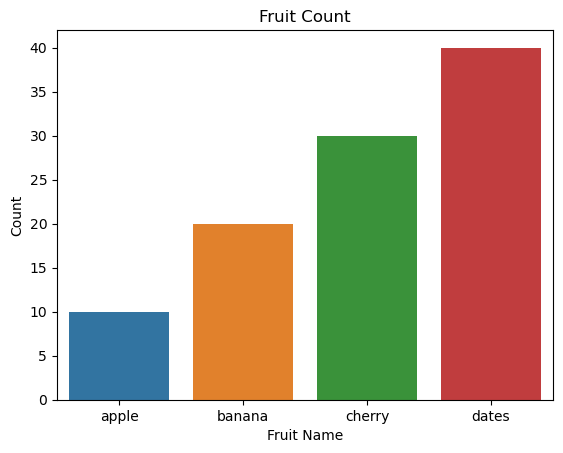

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# sample data
data = {'fruit': ['apple', 'banana', 'cherry', 'dates'],
        'count': [10, 20, 30, 40]}

# create a bar chart using seaborn
sns.barplot(x='fruit', y='count', data=data)

# add labels and title
plt.xlabel('Fruit Name')
plt.ylabel('Count')
plt.title('Fruit Count')

# show plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sample data
x = ['A', 'B', 'C', 'D', 'E']
y = [10, 20, 15, 30, 25]

# create bar chart using Seaborn
sns.barplot(x=x, y=y)

# set chart title and labels
plt.title('Sample Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')

# display chart
plt.show()

# Code to convert cell for another based on json

In [ ]:

import pandas as pd
import json

# Define the Pandas DataFrame
df = pd.DataFrame({
    'name': ['John', 'Mary', 'Bob', 'Alice'],
    'age': [25, 30, 35, 40],
    'gender': ['M', 'F', 'M', 'F']
})

# Define the JSON dictionary to map the gender values
gender_map = {
    'M': 'Male',
    'F': 'Female'
}

# Define a function to apply the mapping to the gender column
def map_gender(gender):
    return gender_map.get(gender, gender)

# Apply the function to the gender column and assign the result to a new column
df['gender_mapped'] = df['gender'].apply(map_gender)

# Print the original and mapped DataFrames
print('Original DataFrame:')
print(df)

print('\nMapped DataFrame:')
print(df[['name', 'age', 'gender_mapped']])

## write a python pandas code checking a cell value in  a specific column in excel file with "if contains" substring from a json, then a create a new column in the excel file for replaced value from the json look up table

In [4]:
import pandas as pd
import openpyxl
import json
import tkinter as tk
from tkinter import filedialog
import datetime as dt

# Load the lookup table from the JSON file
with open(r'C:\Users\Burudani\Documents\mainPythonFolder_v1\JSON\payDescriptionConverter.json', 'r') as f:
    lookup_table = json.load(f)

# Create a tkinter root window
root = tk.Tk()

# Hide the root window
root.withdraw()

# Open a file dialog window to select the CSV file
file_path = filedialog.askopenfilename(filetypes=[('CSV files', '*.csv')])

# Load the CSV file into a pandas dataframe
df = pd.read_csv(file_path)
# Load the Excel file into a Pandas dataframe
#df = pd.read_excel(r"G:\My Drive\Finances\Latest_Statement_April_2023.xlsx")

# Delete the unwanted 3rd and 4th columns (they have unecessary information in them)
df.drop(df.columns[[2, 3]], axis=1, inplace=True)


# Rename the remaining columns with new headers
df.columns = ['date', 'amount', 'Description']

# Define the column to search and the column to create
search_col = 'Description'
create_col = 'Category'


# Loop through the rows of the DataFrame and apply the lookup
for index, row in df.iterrows():
    for key in lookup_table.keys():
        if key in str(row[search_col]):
            df.loc[index, create_col] = lookup_table[key]
            break
    else:
        df.loc[index, create_col] = "NO CATEGORY"
# Get the current date in the format YYYY-MM-DD
current_date = dt.datetime.now().strftime('%Y-%m-%d')

# Create the new file name with the current date
new_file_name = 'Latest_Financial_Expenditure_Statement_' + current_date + '.xlsx'

# Save the dataframe to the new file name and location
df.to_excel(r"G:/My Drive/Finances/" + new_file_name, index=False)
# Save the updated dataframe to the Excel file
#df.to_excel(r"G:\My Drive\Finances\Latest_Statement_March_2023_edited.xlsx", sheet_name='Sheet1',index=False)
print ("Done")

Done


In [2]:
import pandas as pd
import tkinter as tk
from tkinter import filedialog

# Create a tkinter root window
root = tk.Tk()

# Hide the root window
root.withdraw()

# Open a file dialog window to select the CSV file
file_path = filedialog.askopenfilename(filetypes=[('CSV files', '*.csv')])

# Load the CSV file into a pandas dataframe
df = pd.read_csv(file_path)

# Print the dataframe
print(df)

     04/10/2023  -141.77  *  Unnamed: 3  \
0    04/10/2023   -29.74  *         NaN   
1    04/10/2023   -20.32  *         NaN   
2    04/10/2023  -126.57  *         NaN   
3    04/10/2023   -17.98  *         NaN   
4    04/10/2023   -19.20  *         NaN   
..          ...      ... ..         ...   
525  01/03/2023    -0.68  *         NaN   
526  01/03/2023   -22.95  *         NaN   
527  01/03/2023   -20.00  *         NaN   
528  01/03/2023    -0.54  *         NaN   
529  01/03/2023   -18.13  *         NaN   

        GEICO PREM COLL 230408 1457370084 KIRWA A BOIT  
0    PURCHASE AUTHORIZED ON 04/09 FANDANGO 86685751...  
1    PURCHASE AUTHORIZED ON 04/08 TST* GOOD VIEW BA...  
2    PURCHASE AUTHORIZED ON 04/08 SPECS #16 2416 S ...  
3    PURCHASE AUTHORIZED ON 04/08 REGAL BUFFET LEWI...  
4    PURCHASE AUTHORIZED ON 04/08 WAFFLE HOUSE 1585...  
..                                                 ...  
525             INTERNATIONAL PURCHASE TRANSACTION FEE  
526  PURCHASE INTL AUTHORIZ

In [2]:
import pandas as pd
import numpy as np

# Create a list of 9 random dates for January, February and March respectively
jan_dates = pd.date_range(start='2022-01-01', end='2022-01-31', periods=3)
feb_dates = pd.date_range(start='2022-02-01', end='2022-02-28', periods=3)
mar_dates = pd.date_range(start='2022-03-01', end='2022-03-31', periods=3)

# Create a list of categories
categories = ['fast-food', 'entertainment', 'rent']

# Create an empty DataFrame with the required columns
df = pd.DataFrame(columns=['date', 'amount', 'category'])

# Populate the DataFrame with random data
for date_list in [jan_dates, feb_dates, mar_dates]:
    for category in categories:
        date = np.random.choice(date_list)
        amount = np.random.randint(10, 101)
        df = df.append({'date': date, 'amount': amount, 'category': category}, ignore_index=True)

# Print the DataFrame
print(df)

                 date amount       category
0 2022-01-01 00:00:00     61      fast-food
1 2022-01-31 00:00:00     62  entertainment
2 2022-01-31 00:00:00     65           rent
3 2022-02-14 12:00:00     38      fast-food
4 2022-02-14 12:00:00     31  entertainment
5 2022-02-14 12:00:00    100           rent
6 2022-03-01 00:00:00     93      fast-food
7 2022-03-16 00:00:00     63  entertainment
8 2022-03-16 00:00:00     66           rent


C:\Users\Burudani\AppData\Local\Temp\ipykernel_45468\327881418.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'date': date, 'amount': amount, 'category': category}, ignore_index=True)
C:\Users\Burudani\AppData\Local\Temp\ipykernel_45468\327881418.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'date': date, 'amount': amount, 'category': category}, ignore_index=True)
C:\Users\Burudani\AppData\Local\Temp\ipykernel_45468\327881418.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'date': date, 'amount': amount, 'category': category}, ignore_index=True)
C:\Users\Burudani\AppData\Local\Temp\ipykernel_45468\327881418.py:20: FutureWarning: The frame.append method is dep

C:\Users\Burudani\AppData\Local\Temp\ipykernel_45468\916661303.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'date': date, 'amount': amount, 'category': category}, ignore_index=True)
C:\Users\Burudani\AppData\Local\Temp\ipykernel_45468\916661303.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'date': date, 'amount': amount, 'category': category}, ignore_index=True)
C:\Users\Burudani\AppData\Local\Temp\ipykernel_45468\916661303.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'date': date, 'amount': amount, 'category': category}, ignore_index=True)
C:\Users\Burudani\AppData\Local\Temp\ipykernel_45468\916661303.py:18: FutureWarning: The frame.append method is dep

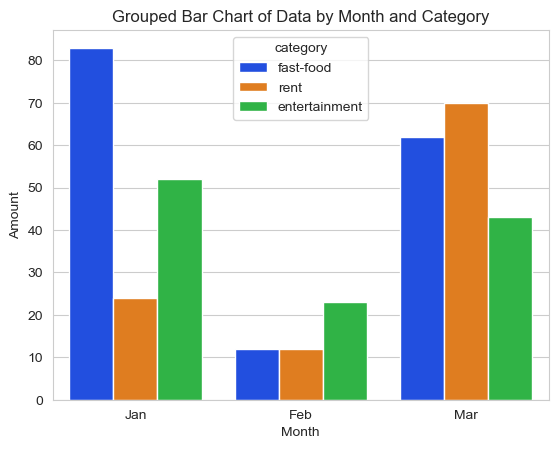

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame with random data
jan_dates = pd.date_range(start='2022-01-01', end='2022-01-31', periods=3)
feb_dates = pd.date_range(start='2022-02-01', end='2022-02-28', periods=3)
mar_dates = pd.date_range(start='2022-03-01', end='2022-03-31', periods=3)

categories = ['fast-food', 'entertainment', 'rent']

df = pd.DataFrame(columns=['date', 'amount', 'category'])

for date_list in [jan_dates, feb_dates, mar_dates]:
    for category in categories:
        date = np.random.choice(date_list)
        amount = np.random.randint(10, 101)
        df = df.append({'date': date, 'amount': amount, 'category': category}, ignore_index=True)

# Group the data by month and category and compute the mean of the amount column
grouped_data = df.groupby(['date', 'category'])['amount'].mean().reset_index()

# Create the bar chart
sns.set_style("whitegrid")
sns.set_palette("bright")
sns.barplot(x=grouped_data['date'].dt.strftime('%b'), y="amount", hue="category", data=grouped_data)

# Set the plot title and labels
plt.title("Grouped Bar Chart of Data by Month and Category")
plt.xlabel("Month")
plt.ylabel("Amount")

# Show the plot
plt.show()

C:\Users\Burudani\AppData\Local\Temp\ipykernel_45468\1514785907.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'date': date, 'amount': amount, 'category': category}, ignore_index=True)
C:\Users\Burudani\AppData\Local\Temp\ipykernel_45468\1514785907.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'date': date, 'amount': amount, 'category': category}, ignore_index=True)
C:\Users\Burudani\AppData\Local\Temp\ipykernel_45468\1514785907.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'date': date, 'amount': amount, 'category': category}, ignore_index=True)
C:\Users\Burudani\AppData\Local\Temp\ipykernel_45468\1514785907.py:19: FutureWarning: The frame.append method is

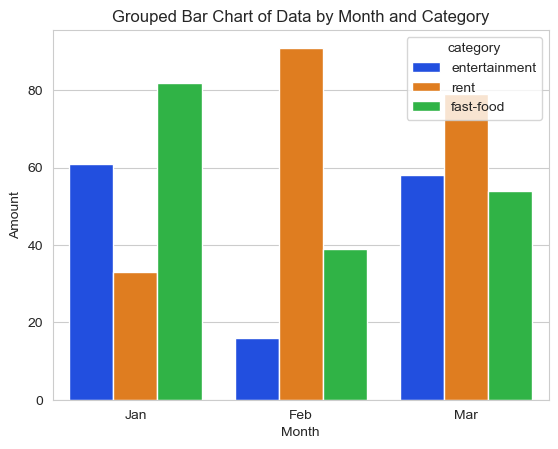

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame with random data
jan_dates = pd.date_range(start='2022-01-01', end='2022-01-31', periods=3)
feb_dates = pd.date_range(start='2022-02-01', end='2022-02-28', periods=3)
mar_dates = pd.date_range(start='2022-03-01', end='2022-03-31', periods=3)

categories = ['fast-food', 'entertainment', 'rent']

df = pd.DataFrame(columns=['date', 'amount', 'category'])

for date_list in [jan_dates, feb_dates, mar_dates]:
    for category in categories:
        date = np.random.choice(date_list)
        amount = np.random.randint(10, 101)
        df = df.append({'date': date, 'amount': amount, 'category': category}, ignore_index=True)

# Group the data by month and category and compute the mean of the amount column
grouped_data = df.groupby(['date', 'category'])['amount'].mean().reset_index()

# Create the bar chart
sns.set_style("whitegrid")
sns.set_palette("bright")
ax = sns.barplot(x=grouped_data['date'].dt.strftime('%b'), y="amount", hue="category", data=grouped_data)

# Define the function to format the toolbar text when hovering over a data point
def format_coord(x, y):
    x_date = pd.to_datetime(ax.get_xticklabels()[int(x)].get_text() + ' 2022')
    y_amount = round(y, 2)
    return f"{x_date:%b}: ${y_amount}"

# Set the plot title and labels
plt.title("Grouped Bar Chart of Data by Month and Category")
plt.xlabel("Month")
plt.ylabel("Amount")

# Set the format_coord function as the format cursor function
ax.format_coord = format_coord

# Show the plot
plt.show()

IndexError: list index out of range

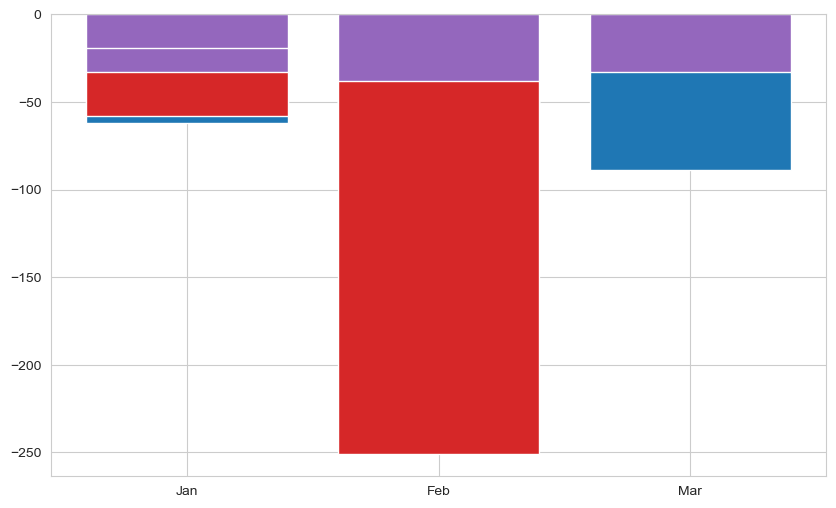

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from an Excel file
df = pd.read_excel("G:\My Drive\Finances\Latest_Statement_March_2023_edited.xlsx", sheet_name='Sheet1')

# Group the data by month and category and compute the mean of the amount column
df['date'] = pd.to_datetime(df['date'])  # Convert date column to datetime format
grouped_data = df.groupby(['date', 'category'])['amount'].mean().reset_index()

# Get the top 5 categories by amount for each month
top5 = grouped_data.groupby('date').apply(lambda x: x.nlargest(5, 'amount')).reset_index(drop=True)

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
for i, cat in enumerate(top5['category'].unique()):
    data = top5[top5['category'] == cat]
    ax.bar(data['date'].dt.strftime('%b'), data['amount'], color=colors[i], label=cat)

# Set the plot title and labels
plt.title("Top 5 Categories by amount per Month")
plt.xlabel("Month")
plt.ylabel("amount")
plt.legend()

# Invert the y-axis to invert the positive and negative values
ax.invert_yaxis()

# Format the tooltip to show the amount and category
def format_tooltip(x, y):
    return f"{y:.2f}"

plt.gca().format_ydata = format_tooltip

# Show the plot
plt.show()

## Chatgpt Question prompt